# Média Móvel para Detectar Variação em Ações no Tempo
Prof. Fernando Amaral

In [19]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [20]:
stock = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv",index_col='Date', parse_dates=['Date'])

In [21]:
stock.head(n=8)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM
2006-01-12,78.20,78.23,77.20,77.70,2121100,MMM


In [22]:
g_stk = stock.query('Name == "GOOGL"')

In [23]:
g_stk.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [24]:
g_stk['Ticks'] = range(0,len(g_stk.index.values))

C:\Users\webma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
g_stk.head()

,Open,High,Low,Close,Volume,Name,Ticks
Date,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4


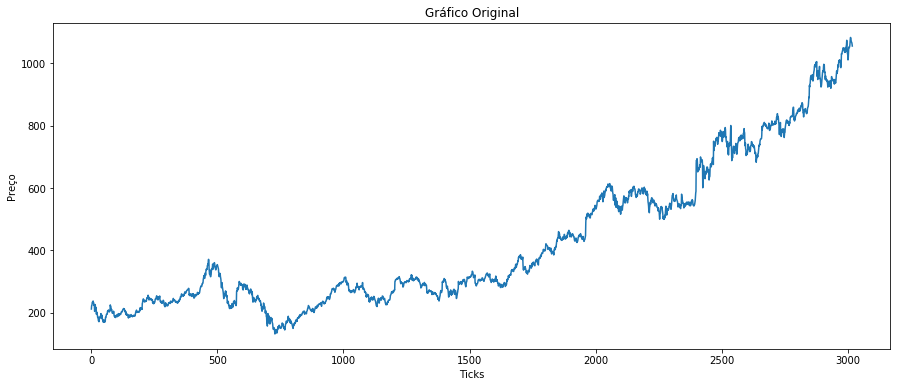

In [26]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Preço')
ax1.set_title('Gráfico Original')
ax1.plot('Ticks', 'Open', data = g_stk);

In [27]:
g_stk['Rolling_Mean'] = g_stk['Open'].rolling(window = 80).mean()
g_stk.head(5)

C:\Users\webma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL,0,NaN
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL,1,NaN
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL,2,NaN
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL,3,NaN
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL,4,NaN


In [28]:
filt_g = g_stk[(g_stk['Ticks'] >= 900) & (g_stk['Ticks'] <= 1100)]
filt_g.head()

,Open,High,Low,Close,Volume,Name,Ticks,Rolling_Mean
Date,,,,,,,,
2009-07-31,225.21,226.58,221.44,221.75,2861550,GOOGL,900,205.07250
2009-08-03,224.59,227.18,224.04,226.33,2591173,GOOGL,901,205.60575
2009-08-04,224.91,227.23,224.44,227.09,2390098,GOOGL,902,206.10550
2009-08-05,228.23,228.68,224.16,225.80,2342227,GOOGL,903,206.63525
2009-08-06,227.38,227.67,224.49,225.41,2111395,GOOGL,904,207.11925


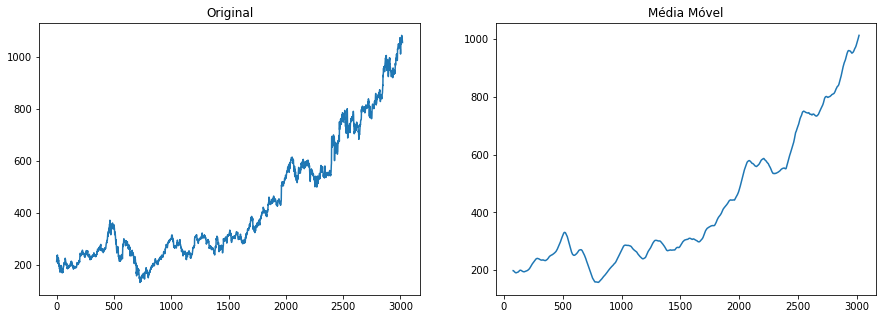

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = g_stk);
axes[0].set_title('Original');

axes[1].plot('Ticks', 'Rolling_Mean', data = g_stk);
axes[1].set_title('Média Móvel');